In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import peakutils
from util.FreqReader import read_freq

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200

In [3]:
def do_anharmonism_correction(x, coef1, coef2):
    if 1000 < x < 2000:
        x = x - 1000
        x = (x * coef1) + 1000 * coef1
    elif 2000 < x:
        x = x - 2000
        x = (x * coef2) + 2000 * coef2
    return x

In [6]:
succinic_acid = read_freq("./succinic_acid/out/C4H6O4.txt")
succinic_acid_water = read_freq("./succinic_acid/out/C4H6O4_H2O.txt")
succinic_acid_water8 = read_freq("./succinic_acid/out/C4H6O4_(H2O)8.txt")
two_succinic_acid = read_freq("./succinic_acid/out/Dimer.txt")
two_succinic_acid_2water = read_freq("./succinic_acid/out/Dimer_(H2O)2.txt")
two_succinic_acid_12water = read_freq("./succinic_acid/out/Dimer_(H2O)12.txt")

In [8]:
def plot_graph(df, legends, legend_title, coef1=1, coef2=1):
    x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
    y = df['Y']
    peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
    plt.plot(x, y, '-', lw=1.7, alpha=1)
    for peak in peaks:
        if x[peak] > 2000:
            plt.text(x[peak], y[peak] + 50, int(x[peak]), horizontalalignment='center', color='darkgreen')
    plt.plot(x[peaks], y[peaks], 'darkgreen', marker="o", ls="", ms=5)


In [17]:
def plot_graph_2(df1, df2, legends, legend_title, coef1=1, coef2=1, y_shift=0):
    x1 = df1['X']
    y1 = df1['Y']

    x2 = df2['X']
    y2 = df2['Y']

    peaks_1 = peakutils.indexes(y1, thres=0.01, min_dist=1)
    peaks_2 = peakutils.indexes(y2, thres=0.01, min_dist=1)

    

    for peak in peaks_1:
        if x1[peak] > 2000:
            plt.text(x1[peak], y1[peak] + 50, int(x1[peak]), horizontalalignment='center', color='darkgreen')

    for peak in peaks_2:
        if x2[peak] > 2000:
            plt.text(x2[peak], y2[peak] + 50 + y_shift, int(x2[peak]), horizontalalignment='center', color='darkgreen')

    plt.plot(x1, y1, '-', lw=1.7, alpha=1)
    plt.plot(x2, y2 + y_shift, '--', lw=1.7, alpha=1)

    plt.plot(x1[peaks_1], y1[peaks_1], 'darkgreen', marker="o", ls="", ms=5)
    plt.plot(x2[peaks_2], y2[peaks_2]+y_shift, 'maroon', marker="o", ls="", ms=5)
    
    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))

In [ ]:
def plot_graph_3(dataFrame_1, dataFrame_2, dataFrame_3, legends, legend_title, coef1=1, coef2=1, mp_y_1=1, mp_y_2=1,
                 mp_y_3=1):
    x1 = dataFrame_1['freq']
    y1 = dataFrame_1['value'] * dataFrame_3['value'].max() * mp_y_1

    x2 = dataFrame_2['freq']
    y2 = dataFrame_2['value'] * dataFrame_3['value'].max() * mp_y_2

    x3 = dataFrame_3['freq'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
    y3 = dataFrame_3['value'] * mp_y_3

    peaks_3 = peakutils.indexes(y3, thres=0.01, min_dist=1)

    plt.plot(x1, y1, '-', lw=1.7, alpha=1)
    plt.plot(x2, y2, '--', lw=1.7, alpha=1)
    plt.plot(x3, y3, '-.', lw=1.7, alpha=1)

    for peak in peaks_3:
        if x3[peak] > 2000:
            plt.text(x3[peak], y3[peak] + 50, int(x3[peak]), horizontalalignment='center', color='darkgreen')
    plt.plot(x3[peaks_3], y3[peaks_3], 'darkgreen', marker="o", ls="", ms=5)

    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))

In [ ]:
def plot_graph4(dataFrame_1, dataFrame_2, dataFrame_3, dataFrame_4, legends, legend_title, coef1=1, coef2=1, coef3=1,
               coef4=1, mp_y_1=1, mp_y_2=1, mp_y_3=1, mp_y_4=1):
    max = dataFrame_3['value'].max() if dataFrame_3['value'].max() > dataFrame_4['value'].max() else dataFrame_4[
        'value'].max()

    x1 = dataFrame_1['freq']
    y1 = dataFrame_1['value'] * max * mp_y_1

    x2 = dataFrame_2['freq']
    y2 = dataFrame_2['value'] * max * mp_y_2

    x3 = dataFrame_3['freq'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
    y3 = dataFrame_3['value'] * mp_y_3

    x4 = dataFrame_4['freq'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
    y4 = dataFrame_4['value'] * mp_y_4

    peaks_3 = peakutils.indexes(y3, thres=0.01, min_dist=1)
    peaks_4 = peakutils.indexes(y4, thres=0.01, min_dist=1)


    plt.plot(x1, y1, '-', lw=1.7, alpha=1)
    plt.plot(x2, y2, '--', lw=1.7, alpha=1)
    plt.plot(x3, y3, '-.', lw=1.7, alpha=1)
    plt.plot(x4, y4, ':', lw=1.7, alpha=1)

    for peak in peaks_3:
        if x3[peak] > 2000:
            plt.text(x3[peak], y3[peak] + 50, int(x3[peak]), horizontalalignment='center', color='darkgreen')

    for peak in peaks_4:
        if x4[peak] > 2000:
            plt.text(x4[peak], y4[peak] + 110, int(x4[peak]), horizontalalignment='center', color='maroon')

    plt.plot(x3[peaks_3], y3[peaks_3], 'darkgreen', marker="o", ls="", ms=5)
    plt.plot(x4[peaks_4], y4[peaks_4], 'maroon', marker="o", ls="", ms=5)

    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))

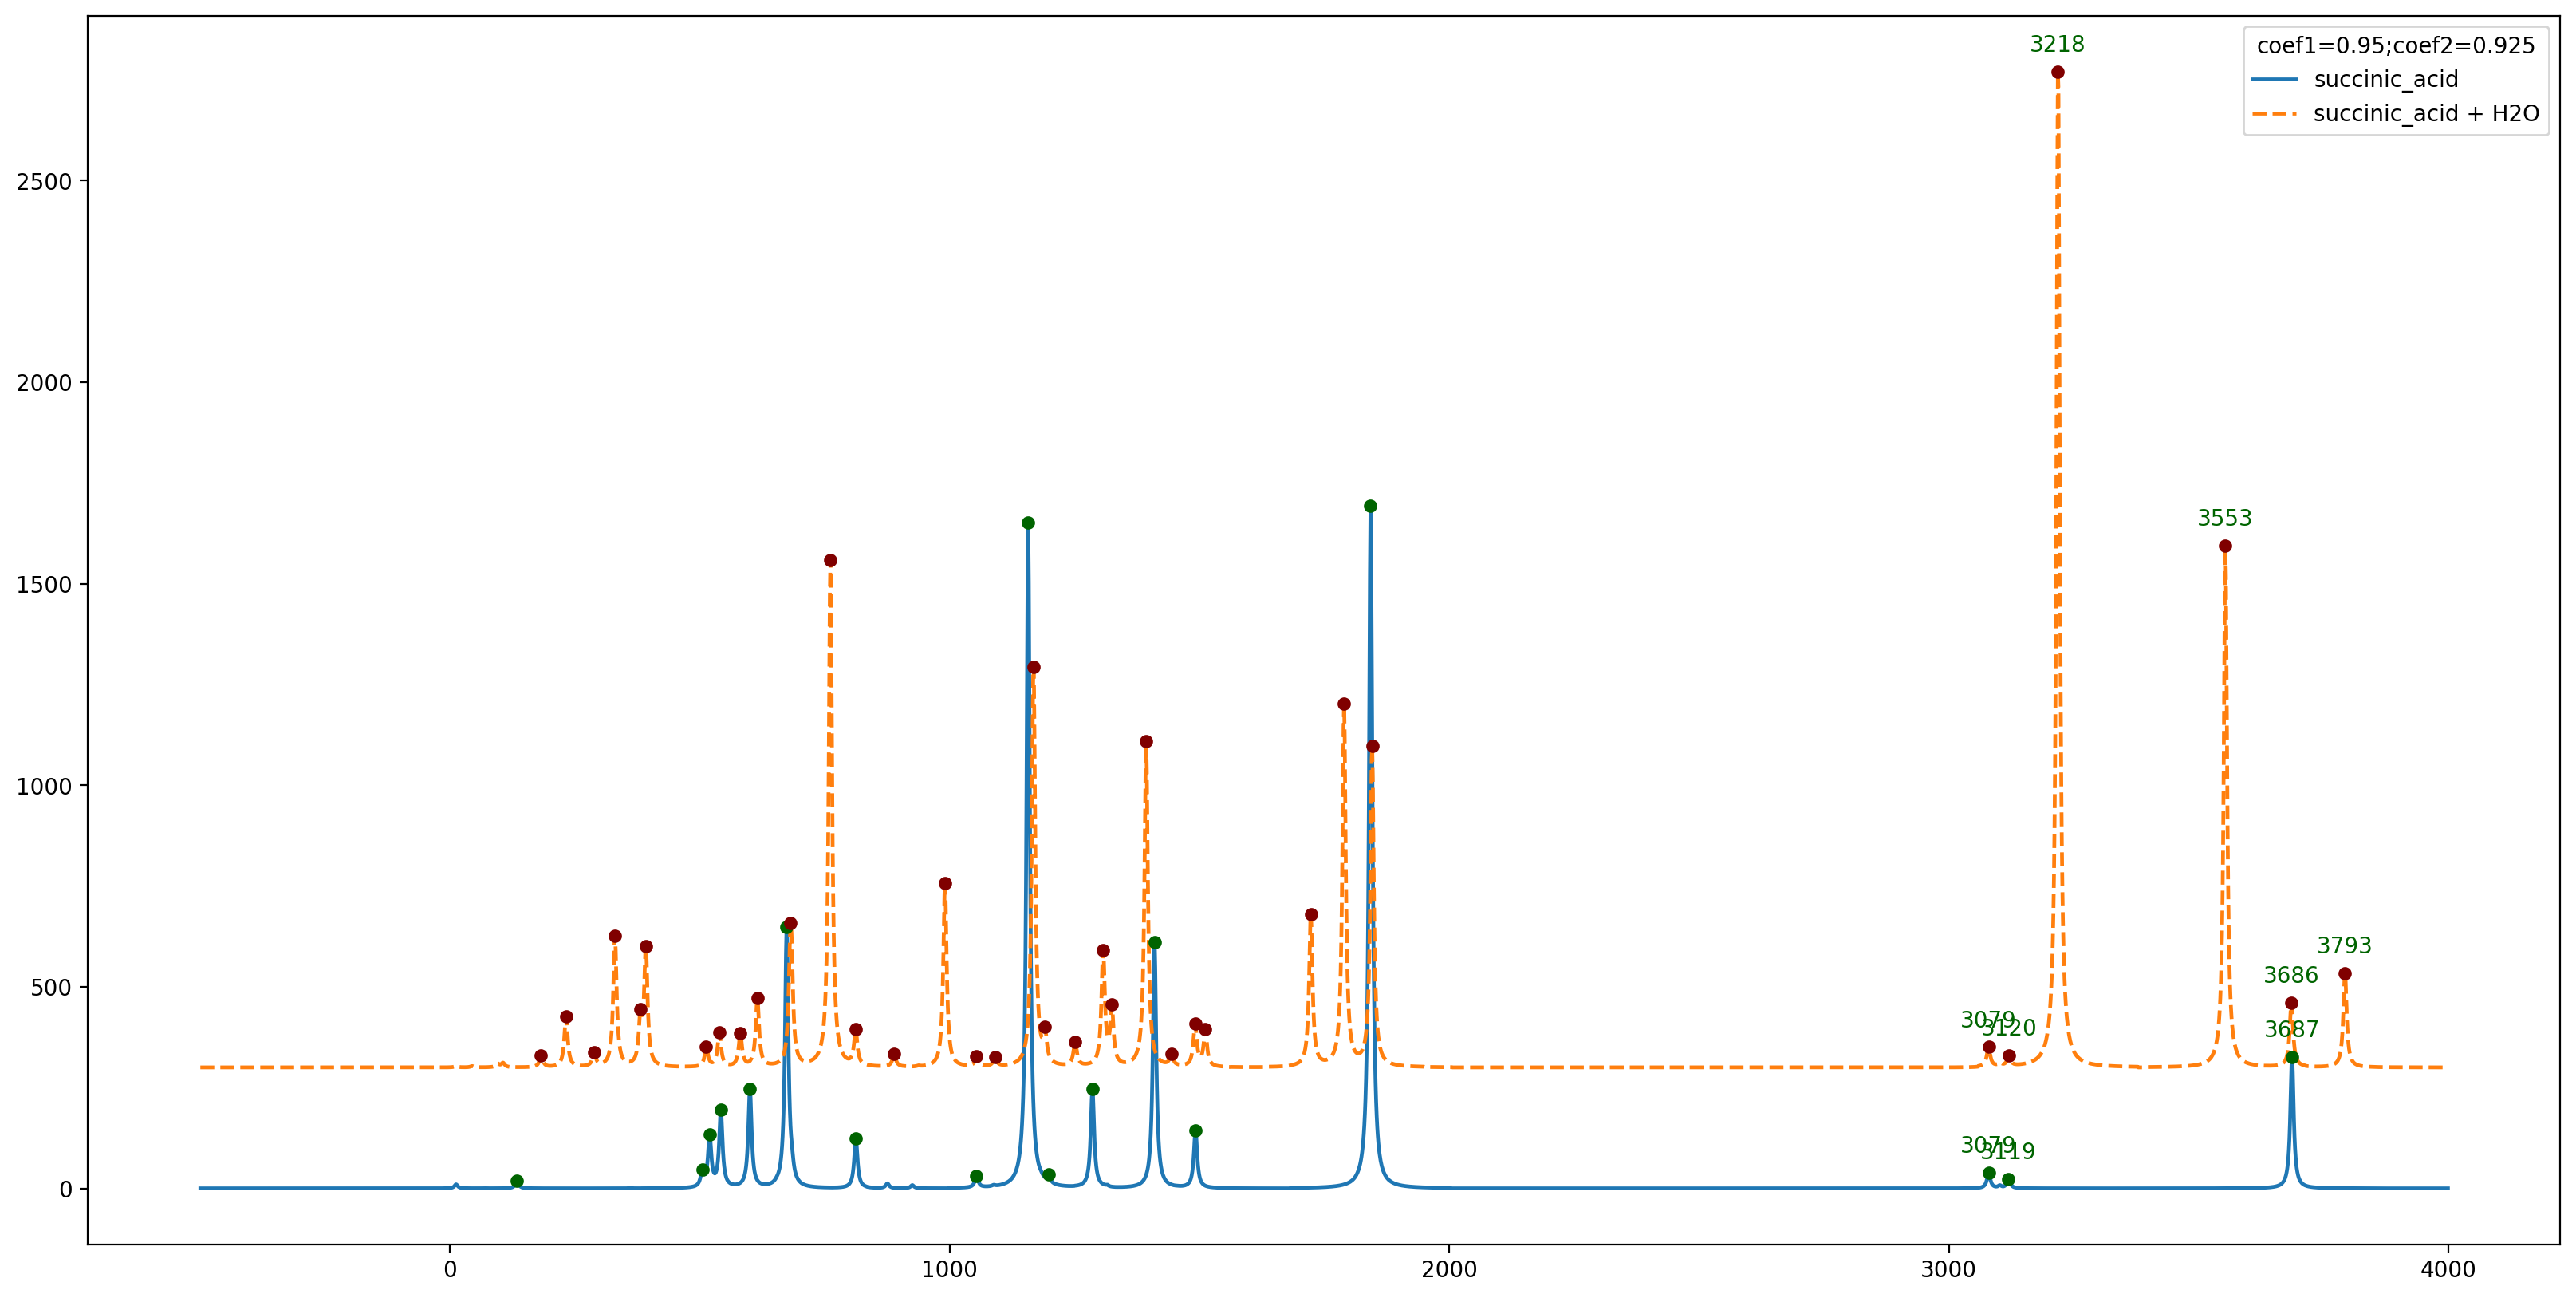

In [18]:
plot_graph_2(succinic_acid, succinic_acid_water, ['succinic_acid', 'succinic_acid + H2O'], '', coef1=0.95, coef2=0.925, y_shift=300)

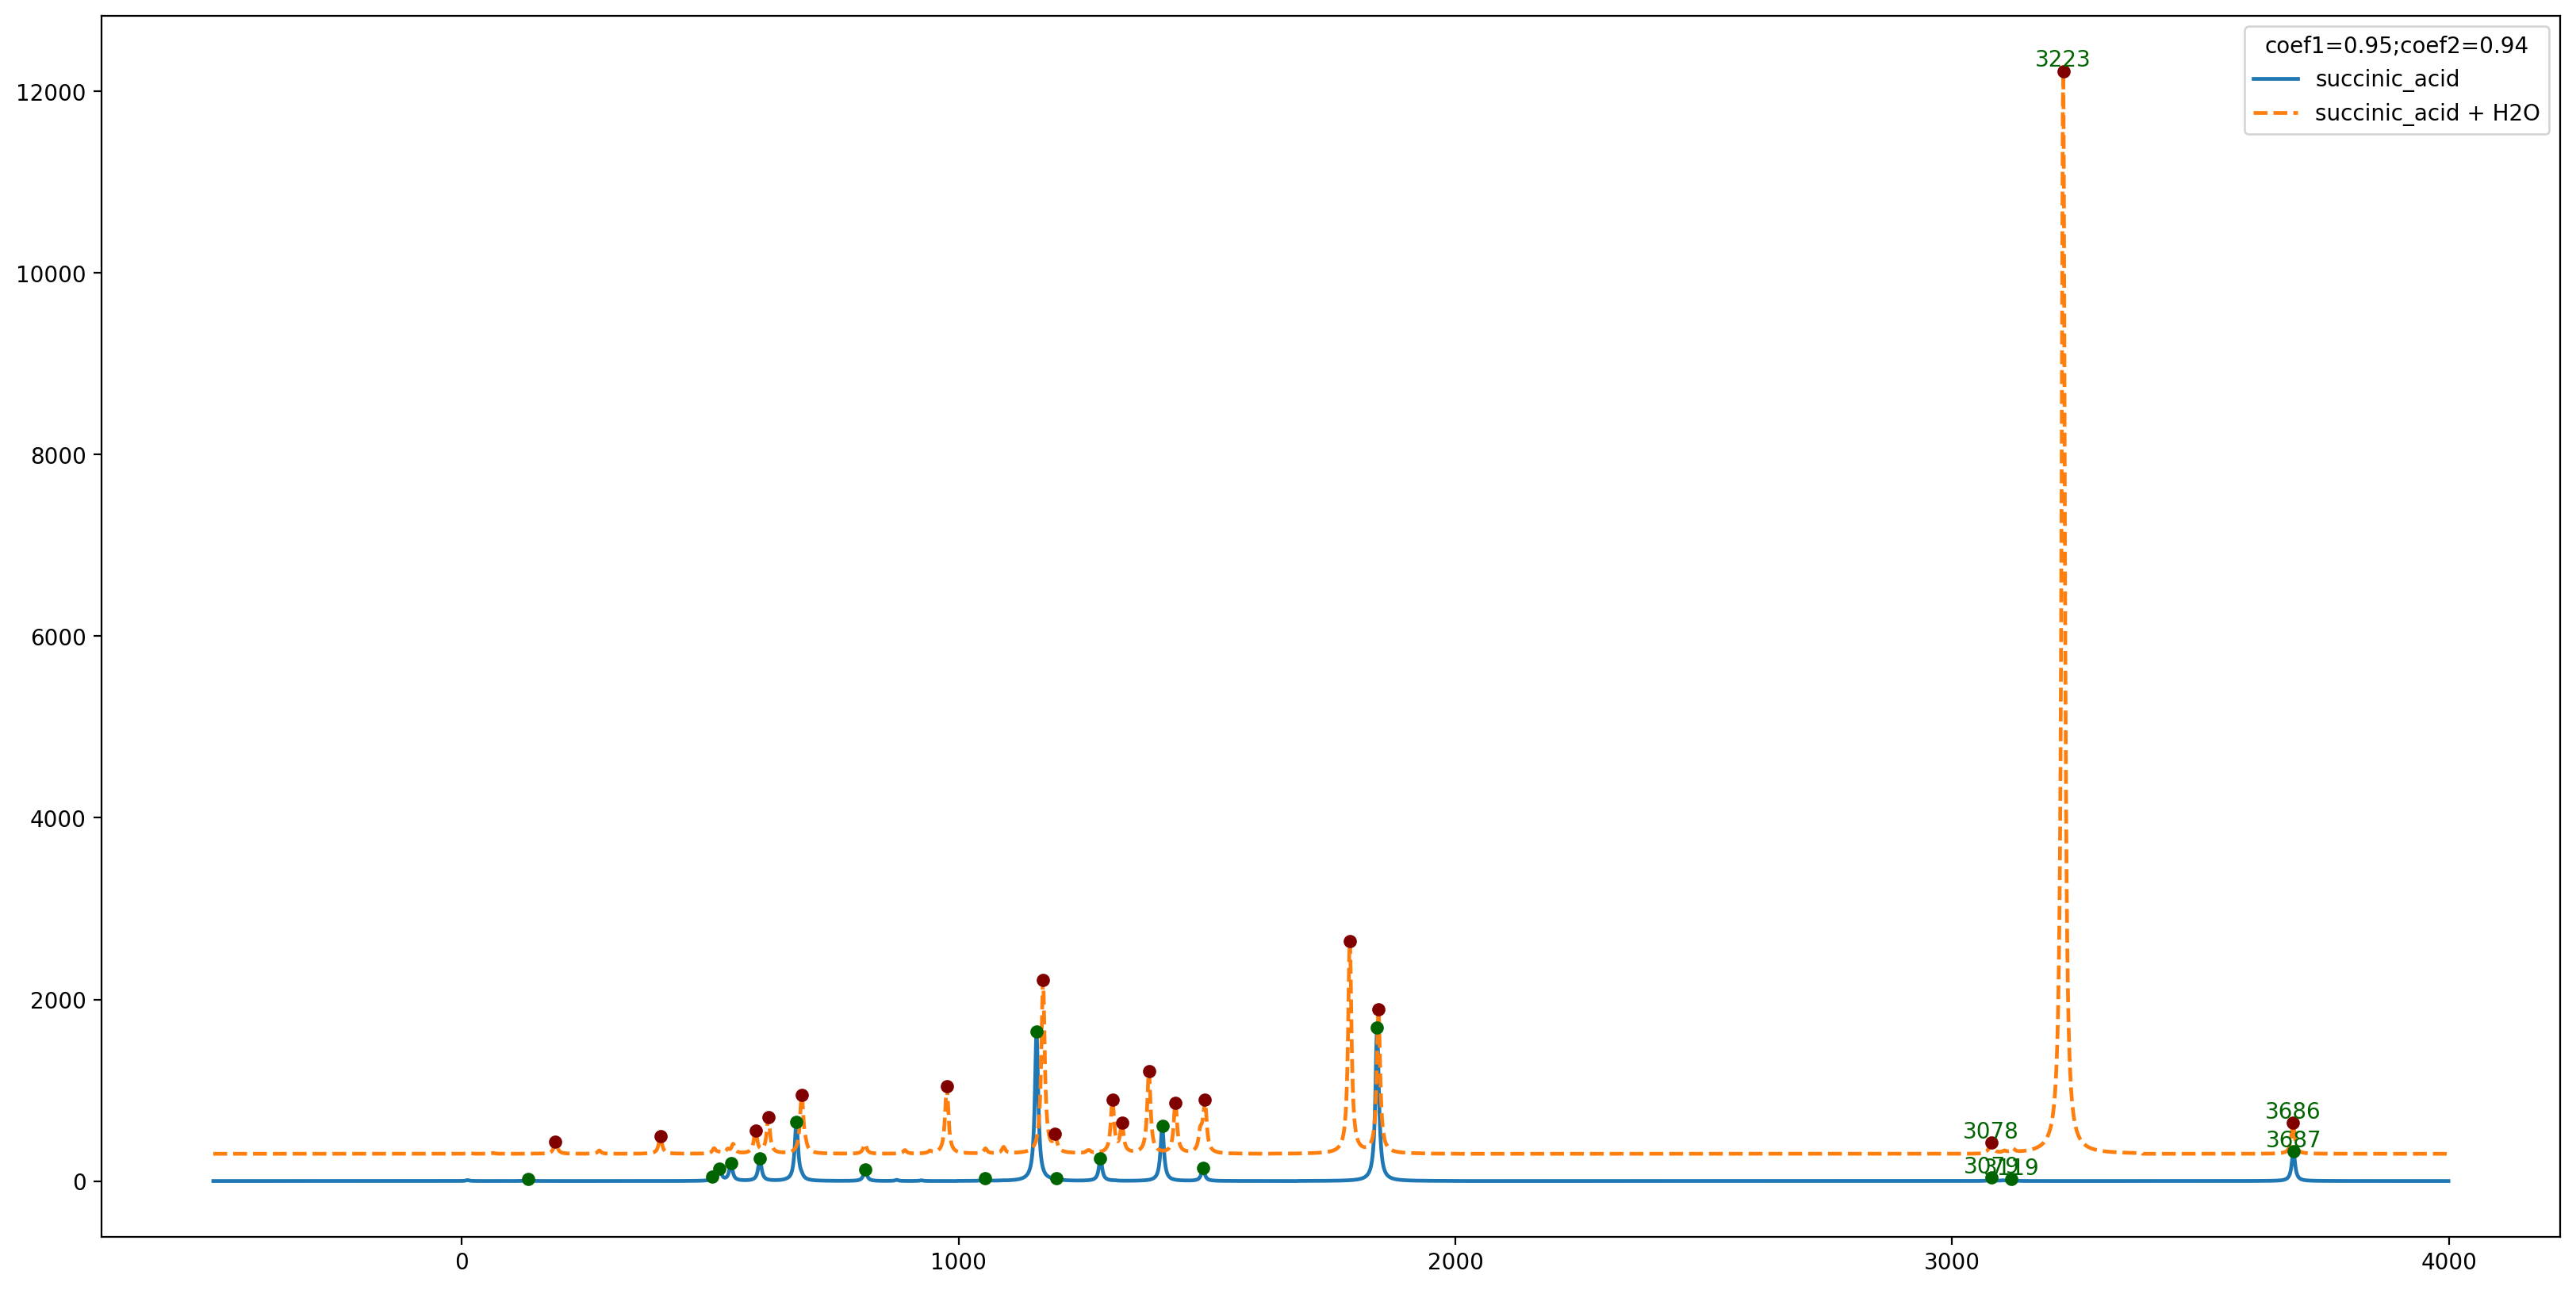

In [20]:
plot_graph_2(succinic_acid, two_succinic_acid, ['succinic_acid', 'succinic_acid + H2O'], '', coef1=0.95, coef2=0.94, y_shift=300)